# Mini Project: Exploratory Data Analysis

# Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset

Data has become the lifeblood of the modern world, permeating every aspect of our lives and transforming the way we make decisions. In this era of vast information, the ability to extract meaningful insights from raw data has emerged as a crucial skill. Enter exploratory data analysis (EDA), a powerful approach that allows us to unravel hidden patterns, detect anomalies, and generate valuable knowledge from the vast volumes of data at our disposal.

Exploratory data analysis serves as the initial step in any data-driven investigation, offering a comprehensive understanding of the dataset's structure, distributions, and relationships between variables. By applying statistical and visual techniques, analysts gain a deeper insight into the data, paving the way for more accurate predictions, informed decision-making, and the discovery of actionable insights.

To illustrate the significance of exploratory data analysis, we delve into one of the most popular and widely studied datasets in the field—the [NYC Taxi Dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). As the name suggests, this dataset captures detailed information about taxi trips within the bustling city of New York. The NYC Taxi Dataset is an ideal choice for learning and practicing EDA techniques due to its richness, complexity, and real-world applicability.

The dataset encompasses a vast range of attributes, including pickup and drop-off locations, timestamps, trip durations, passenger counts, payment information, and much more. By exploring this data, we can gain valuable insights into the dynamics of taxi usage, understand travel patterns across different neighborhoods, identify peak hours of demand, analyze fare structures, and even uncover interesting anecdotes about the city's vibrant life.

The NYC Taxi Dataset is an excellent resource for aspiring ML practitioners to develop their EDA skills. Its scale, complexity, and real-world relevance make it an engaging playground for uncovering hidden patterns, generating hypotheses, and forming data-driven narratives.

In this mini project, we will dive deep into the NYC Taxi Dataset. We will leverage various EDA techniques to unveil meaningful insights, visualize data distributions, identify outliers, and pose insightful questions that will fuel further analysis and exploration. By the end of this colab, students will have a solid foundation in exploratory data analysis and be equipped to tackle real-world data challenges with confidence.

In [10]:
%pip install requirements.txt

%pip install seaborn pandas pyarrow

%pip install pandas pyarrow


ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
HINT: You are attempting to install a package literally named "requirements.txt" (which cannot exist). Consider using the '-r' flag to install the packages listed in requirements.txt
ERROR: No matching distribution found for requirements.txt
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the NYC taxi dataset into a Pandas DataFrame and do a few basic checks to ensure the data is loaded properly. Note, there are several months of data that can be used. For simplicity, use the Yellow Taxi 2022-01 parquet file [here](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet). Here are your tasks:

  1. Load the `yellow_tripdata_2022-01.parquet` file into Pandas.
  2. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).
  3. How many rows are in the dataset? How many unique columns are in the dataset?
  4. Which columns have NULL values and how many NULL values are present in each of these columns?
  5. Generate summary statistics using Pandas' [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.  
  6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.


In [6]:
# Load parquet file into a Pandas DataFrame
df = pd.read_parquet("yellow_tripdata_2022-01.parquet")


In [12]:
# Display the first few rows of the dataset
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [13]:
# Display the shape of the dataset
print(df.shape)


(2463931, 19)


In [14]:
# Check for missing values
print(df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64


In [16]:
# Summary statistics of the dataset
print(df.describe())


           VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.463931e+06     2.392428e+06   2.463931e+06  2.392428e+06   
mean   1.707819e+00     1.389453e+00   5.372751e+00  1.415507e+00   
std    5.021375e-01     9.829686e-01   5.478714e+02  5.917573e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.040000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.740000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.130000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.061593e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  2.463931e+06  2.463931e+06  2.463931e+06  2.463931e+06  2.463931e+06   
mean   1.660768e+02  1.635807e+02  1.194449e+00  1.294648e+01  1.006710e+00   
std    6.546806e+01  7.079016e+01  5.001778e-01  2.558149e+02  1.236226e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -4.800000e+02 

In [17]:
# Drop rows with missing values.
df_cleaned_data=df.dropna()

#show the new sha[e after dropping missing values
print("Before:", df.shape)
print("After:", df_cleaned_data.shape)

Before: (2463931, 19)
After: (2392428, 19)


Feature engineering is a critical process in machine learning that involves selecting, transforming, and creating features from raw data to improve the performance and accuracy of predictive models. While machine learning algorithms have the capability to automatically learn patterns from data, the quality and relevance of the features used as inputs greatly influence the model's ability to generalize and make accurate predictions. Feature engineering, therefore, plays a crucial role in extracting meaningful information and representing it in a format that best captures the underlying relationships within the data.

Here are your tasks:

  1. Create a new feature that calculates the trip duration in minutes.
  2. Create additional features for the pick-up day of week and pick-up hour.
  3. Use the Seaborn library to create a [line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) depicting the number of trips as a function of the hour of day. What's the busiest time of day?
  4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?

In [28]:
#Display trip start times
df['start_time'] =pd.to_datetime(df['tpep_pickup_datetime'])
print("start_time starts here ", df['start_time'])

#Display trip end times
df['end_time'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print("end_time starts here ", df['end_time'])

# Create a new column for trip duration in minutes
df['trip_duration_time'] = (df['end_time']- df['start_time']).dt.total_seconds() / 60

#Preview the new column
print(df[['start_time','end_time','trip_duration_time']].head())


start_time starts here  0         2022-01-01 00:35:40
1         2022-01-01 00:33:43
2         2022-01-01 00:53:21
3         2022-01-01 00:25:21
4         2022-01-01 00:36:48
                  ...        
2463926   2022-01-31 23:36:53
2463927   2022-01-31 23:44:22
2463928   2022-01-31 23:39:00
2463929   2022-01-31 23:36:42
2463930   2022-01-31 23:46:00
Name: start_time, Length: 2463931, dtype: datetime64[ns]
end_time starts here  0         2022-01-01 00:53:29
1         2022-01-01 00:42:07
2         2022-01-01 01:02:19
3         2022-01-01 00:35:23
4         2022-01-01 01:14:20
                  ...        
2463926   2022-01-31 23:42:51
2463927   2022-01-31 23:55:01
2463928   2022-01-31 23:50:00
2463929   2022-01-31 23:48:45
2463930   2022-02-01 00:13:00
Name: end_time, Length: 2463931, dtype: datetime64[ns]
           start_time            end_time  trip_duration_time
0 2022-01-01 00:35:40 2022-01-01 00:53:29           17.816667
1 2022-01-01 00:33:43 2022-01-01 00:42:07            8.400

In [ ]:
# Create new columns for pickup hour and day of week

#Convert tpep_pickup_datetime to dattime 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

print(df['tpep_pickup_datetime'])


# Create new columns for pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

print("pickup_hour", df['pickup_hour'])

# Create day of week

df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.dayofweek

print("ppickup_day_nameickup_week", df['pickup_day_name'])

#Create day name

df['pickup_day_name1'] = df['tpep_pickup_datetime'].dt.day_name

print("pickup_day_nam1", df['pickup_day_name1'])




0         2022-01-01 00:35:40
1         2022-01-01 00:33:43
2         2022-01-01 00:53:21
3         2022-01-01 00:25:21
4         2022-01-01 00:36:48
                  ...        
2463926   2022-01-31 23:36:53
2463927   2022-01-31 23:44:22
2463928   2022-01-31 23:39:00
2463929   2022-01-31 23:36:42
2463930   2022-01-31 23:46:00
Name: tpep_pickup_datetime, Length: 2463931, dtype: datetime64[ns]
day name 0          <bound method PandasDelegate._add_delegate_acc...
1          <bound method PandasDelegate._add_delegate_acc...
2          <bound method PandasDelegate._add_delegate_acc...
3          <bound method PandasDelegate._add_delegate_acc...
4          <bound method PandasDelegate._add_delegate_acc...
                                 ...                        
2463926    <bound method PandasDelegate._add_delegate_acc...
2463927    <bound method PandasDelegate._add_delegate_acc...
2463928    <bound method PandasDelegate._add_delegate_acc...
2463929    <bound method PandasDelegate._add_

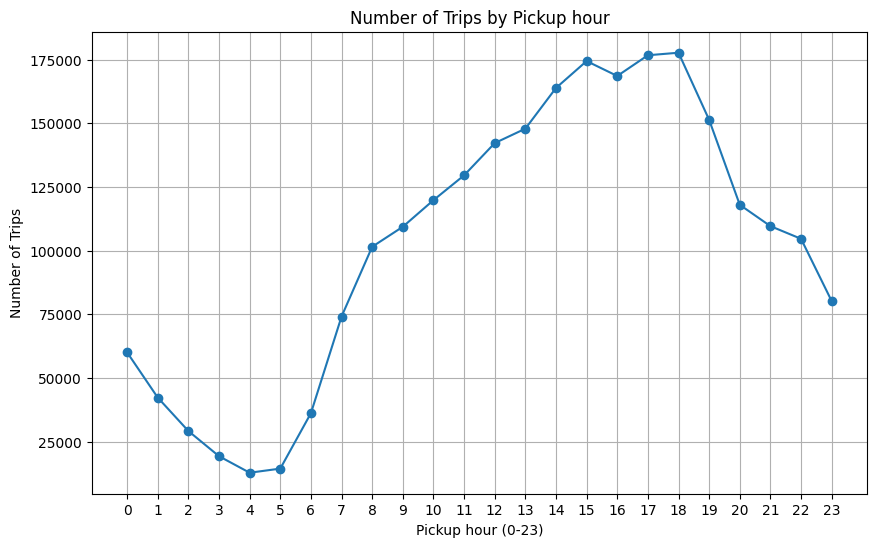

In [42]:
# Create a lineplot displaying the number of trips by pickup hour
#Count trips by pickup hour
trips_by_hour = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(trips_by_hour.index, trips_by_hour.values, marker='o')
plt.title("Number of Trips by Pickup hour")
plt.xlabel("Pickup hour (0-23)")
plt.ylabel("Number of Trips")
plt.xticks(range (0, 24))
plt.grid(True)
plt.show()

trips_by_day_name Monday       374034
Saturday     366297
Friday       362358
Thursday     355413
Sunday       343361
Wednesday    338341
Tuesday      324127
Name: pickup_day_name, dtype: int64
after reindex - trips_by_day Monday       374034
Tuesday      324127
Wednesday    338341
Thursday     355413
Friday       362358
Saturday     366297
Sunday       343361
Name: pickup_day_name, dtype: int64


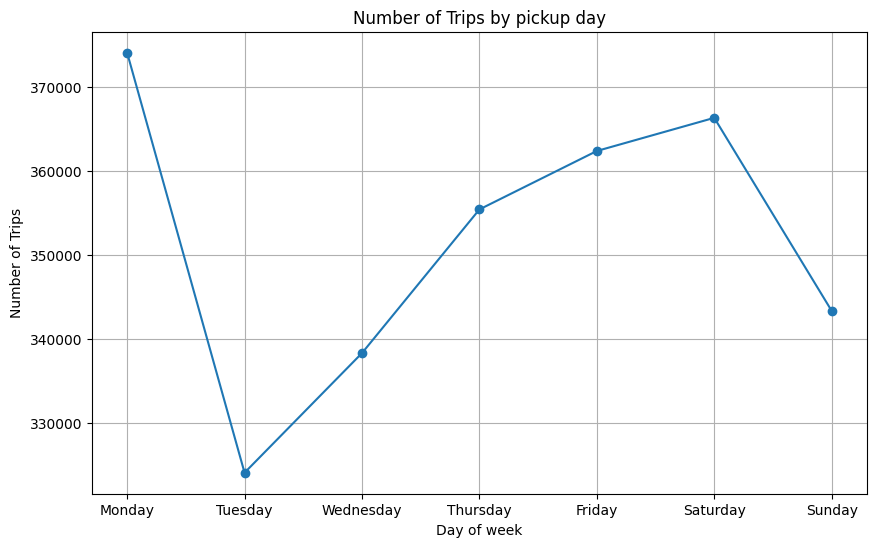

In [62]:
# Create a lineplot displaying the number of trips by pickup day

df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()

#Count trips by pickup day name
trips_by_day = df['pickup_day_name'].value_counts()

print("trips_by_day_name", trips_by_day)

#Reorder days so they appear  Monday- Sunday
day_order =["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

trips_by_day = trips_by_day.reindex(day_order)

print("after reindex - trips_by_day", trips_by_day)

plt.figure(figsize=(10,6))

plt.plot(trips_by_day.index,trips_by_day.values, marker='o')

plt.title("Number of Trips by pickup day")

plt.xlabel("Day of week")

plt.ylabel("Number of Trips")

plt.grid(True)

plt.show()




In the realm of machine learning, understanding the relationships between variables is crucial for building accurate and effective predictive models. One powerful tool for exploring these relationships is the correlation matrix. A correlation matrix provides a comprehensive overview of the pairwise correlations between variables in a dataset, allowing practitioners to quantify and visualize the strength and direction of these associations. This matrix is an essential component of exploratory data analysis and offers several key benefits:

1. Relationship Assessment: The correlation matrix provides a quantitative measure of the relationship between variables. By calculating correlation coefficients, typically using methods like Pearson's correlation coefficient, analysts can determine if variables are positively correlated (increase together), negatively correlated (one increases as the other decreases), or uncorrelated (no systematic relationship). These measures offer insights into the direction and strength of the relationships, helping to identify important variables that may influence the target variable.

2. Feature Selection: Correlation matrices are invaluable in feature selection, which involves identifying the most relevant variables for building predictive models. By examining the correlations between the target variable and other features, analysts can identify highly correlated variables that may be strong predictors. This knowledge enables informed decisions regarding which variables to include in the model, potentially reducing dimensionality, enhancing model efficiency, and preventing issues such as multicollinearity.

3. Multicollinearity Detection: Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can lead to problems such as instability in coefficient estimates, difficulty in interpreting feature importance, and reduced model robustness. By examining the correlation matrix, analysts can identify highly correlated variables and make informed decisions about which ones to include or exclude to mitigate multicollinearity. Removing redundant variables improves model interpretability and generalization.

Here is your task:

  1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

Correlation Matrix:
                     trip_distance  fare_amount  tip_amount  total_amount  \
trip_distance            1.000000     0.000406    0.005931      0.000505   
fare_amount              0.000406     1.000000    0.024442      0.999875   
tip_amount               0.005931     0.024442    1.000000      0.038569   
total_amount             0.000505     0.999875    0.038569      1.000000   
trip_duration_time       0.001458     0.008365    0.086403      0.009962   

                    trip_duration_time  
trip_distance                 0.001458  
fare_amount                   0.008365  
tip_amount                    0.086403  
total_amount                  0.009962  
trip_duration_time            1.000000  


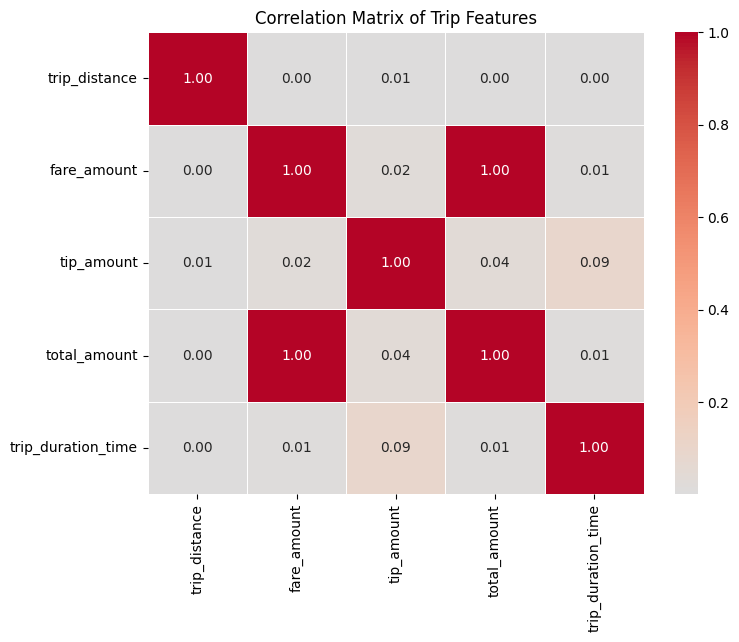

In [ ]:
#Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and 
# use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant columns
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_time']
corr_matrix = df[cols].corr(method='pearson')

print("Correlation Matrix:\n", corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Trip Features")
plt.show()

#Answer--->
#fare_amount ↔ total_amount: Very strong positive correlation (since total includes fare + extras + tip).

#tip_amount ↔ total_amount: Strong positive correlation (tips add to total).

#trip_distance ↔ fare_amount: Moderate to strong positive correlation (longer trips usually cost more).

#trip_distance ↔ trip_duration_time: Positive correlation, though not perfect (traffic conditions affect duration).


Correlation Matrix:
                     trip_distance  fare_amount  tip_amount  total_amount  \
trip_distance            1.000000     0.000406    0.005931      0.000505   
fare_amount              0.000406     1.000000    0.024442      0.999875   
tip_amount               0.005931     0.024442    1.000000      0.038569   
total_amount             0.000505     0.999875    0.038569      1.000000   
trip_duration_time       0.001458     0.008365    0.086403      0.009962   

                    trip_duration_time  
trip_distance                 0.001458  
fare_amount                   0.008365  
tip_amount                    0.086403  
total_amount                  0.009962  
trip_duration_time            1.000000  


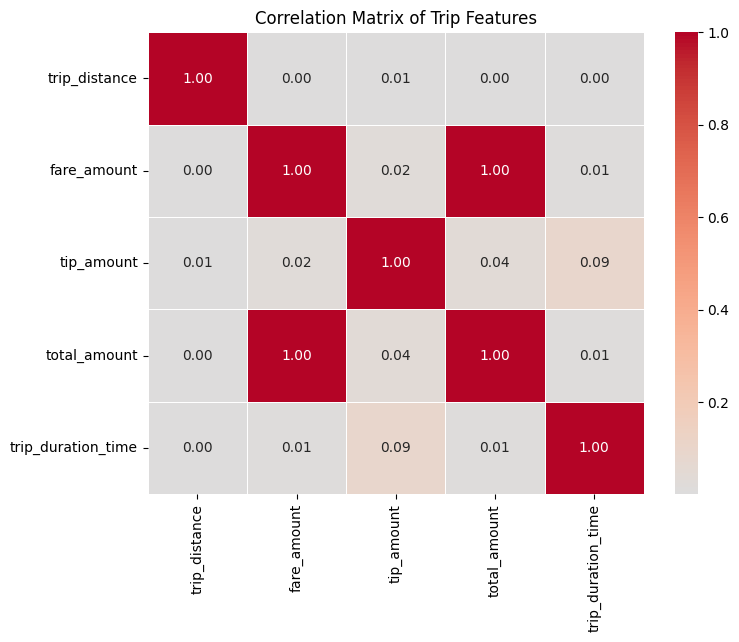


Top 3 Strongest Correlations:
      Variable1           Variable2  Correlation
8   fare_amount        total_amount     0.999875
14   tip_amount  trip_duration_time     0.086403
13   tip_amount        total_amount     0.038569


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only the relevant columns
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_time']
corr_matrix = df[cols].corr(method='pearson')

print("Correlation Matrix:\n", corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Trip Features")
plt.show()

# ---- Rank the strongest correlations ----
# Unstack and reset index
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Remove self-correlations (correlation = 1)
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]

# Remove duplicate pairs (A-B and B-A are the same)
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

# Sort by absolute correlation
top_corr = corr_pairs.reindex(corr_pairs.Correlation.abs().sort_values(ascending=False).index)

print("\nTop 3 Strongest Correlations:")
print(top_corr.head(3))


Correlation matrix:
                        VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               1.000000         0.139438       0.002708   -0.089825   
passenger_count        0.139438         1.000000       0.022540   -0.022774   
trip_distance          0.002708         0.022540       1.000000    0.072409   
RatecodeID            -0.089825        -0.022774       0.072409    1.000000   
PULocationID           0.020493        -0.008379      -0.002976   -0.038048   
DOLocationID          -0.011890        -0.003569      -0.001123   -0.026843   
payment_type          -0.059438         0.002325      -0.009932   -0.029265   
fare_amount            0.001257         0.000808       0.000406    0.006774   
extra                 -0.794803        -0.114546      -0.003212   -0.051599   
mta_tax               -0.040216         0.001258      -0.000433   -0.015968   
tip_amount             0.010230         0.012519       0.005931   -0.032063   
tolls_amount          -0.001530

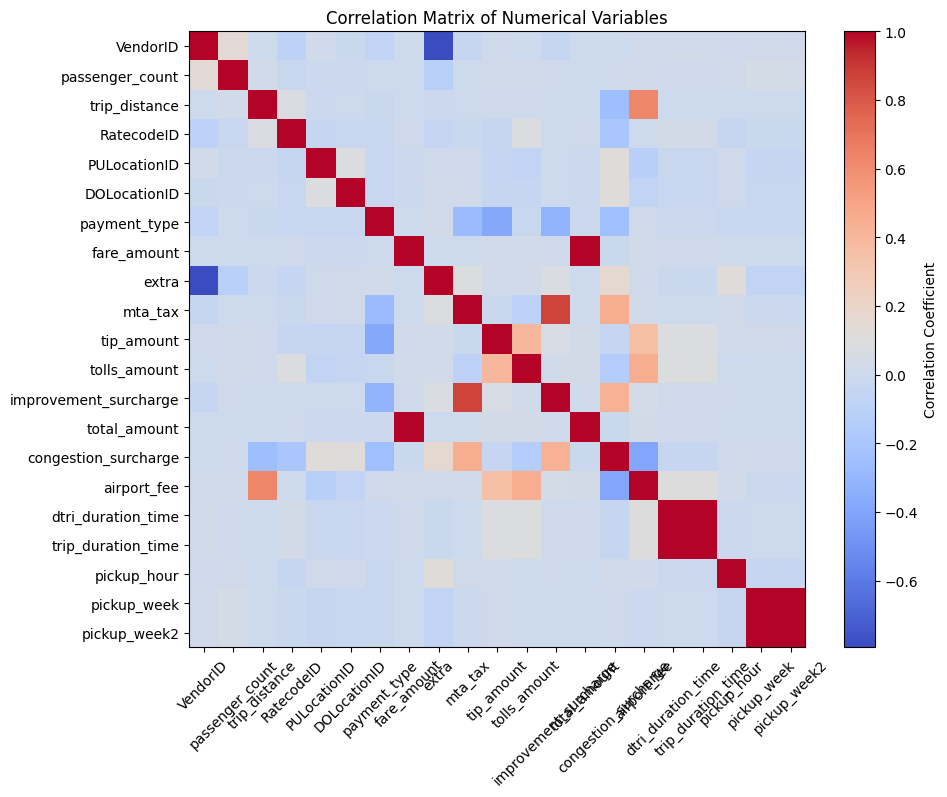

In [63]:
# Compute correlation matrix of numerical variables
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

print("Correlation matrix:\n", corr_matrix)

# Optional: visualize with a heatmap
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Create a heatmap of the correlation matrix

Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. Each subplot in the pairplot represents the scatterplot of one variable against another. Pairplots offer several advantages in EDA:

  - Variable Relationships: Pairplots enable analysts to explore the relationships between variables, revealing patterns such as linear or nonlinear correlations, clusters, or other associations. These visual cues guide further analysis, feature selection, or modeling decisions.

  - Multivariate Analysis: Pairplots help identify multivariate dependencies and interactions, highlighting how different variables jointly influence one another. This is particularly valuable in identifying potential confounding factors or discovering hidden interactions that may not be apparent when considering variables in isolation.

  - Outlier Detection: Pairplots can reveal potential outliers by showing data points that deviate significantly from the general pattern observed between variables. Outliers can indicate data anomalies or influential observations that may impact model performance.

  - Feature Importance: Pairplots provide an intuitive representation of the relative importance of different features. Variables exhibiting strong correlations or clear patterns may be more relevant for predictive modeling or feature selection.

  - Data Quality: Pairplots can help identify data quality issues, such as data entry errors or measurement inconsistencies. Patterns that do not align with expectations or exhibit unusual trends may signal data problems that require further investigation or preprocessing.

Here is your task:

  1. Create a [pairplot matrix](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the [sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?

/Users/jaffer/Documents/ML-PRACTICE/PYTHON-FILES/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


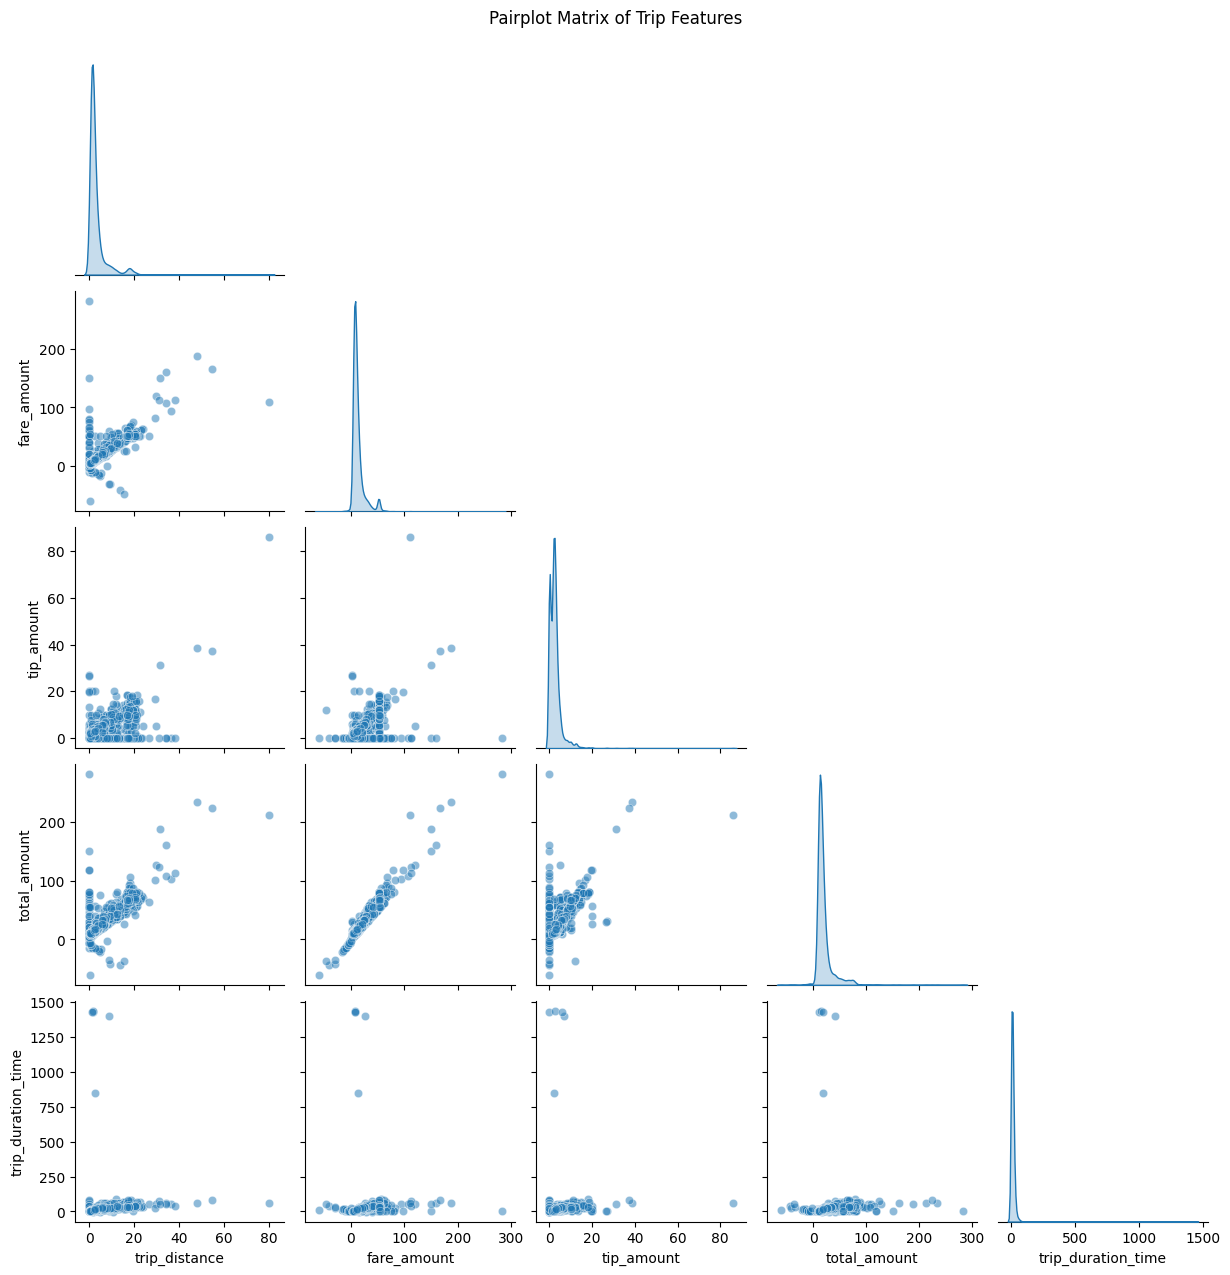

In [69]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.

# Select columns of interest
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_time']

# Sample the dataset (e.g., 5000 rows for visualization)
df_sample = df[cols].dropna().sample(n=5000, random_state=42)

# Create pairplot
sns.pairplot(df_sample, diag_kind="kde", corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pairplot Matrix of Trip Features", y=1.02)
plt.show()


A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset. It is particularly useful for visualizing the distribution and frequency of categorical variables. Here are some key uses and benefits of count plots:

  - Categorical Variable Exploration: Count plots provide a quick and concise summary of the distribution of categorical variables. They allow analysts to understand the frequency or count of each category, revealing the proportions and imbalances within the dataset. This information is crucial for gaining insights into the composition and characteristics of categorical variables.

  - Class Imbalance Assessment: In classification tasks, count plots help assess the balance or imbalance of different target classes. It provides a visual representation of the distribution of classes, highlighting any significant discrepancies in the sample sizes across categories. Identifying imbalanced classes is important in machine learning as it can affect model performance and bias the predictions towards the majority class.

  - Data Quality Inspection: Count plots can be utilized to detect data quality issues in categorical variables. It allows analysts to identify unexpected or erroneous categories that may indicate data entry errors, missing data, or inconsistencies in the dataset. By observing the counts for each category, anomalies or discrepancies can be easily spotted, enabling data cleaning or further investigation if necessary.

  - Feature Importance Evaluation: Count plots can provide insights into the importance or relevance of different categorical features in relation to the target variable. By visualizing the distribution of categories within each class or target level, analysts can determine which categories are more prevalent or have higher frequencies for specific outcomes. This understanding helps in assessing the discriminatory power of categorical features and their potential impact on predictive models.

Here is your task:

  1. Use Seaborn to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?

/var/folders/v4/6jx7p5p972g59nvc4vn2pzb40000gn/T/ipykernel_3604/2323822451.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pu, x='PULocationID', order=top_pu, palette="viridis")


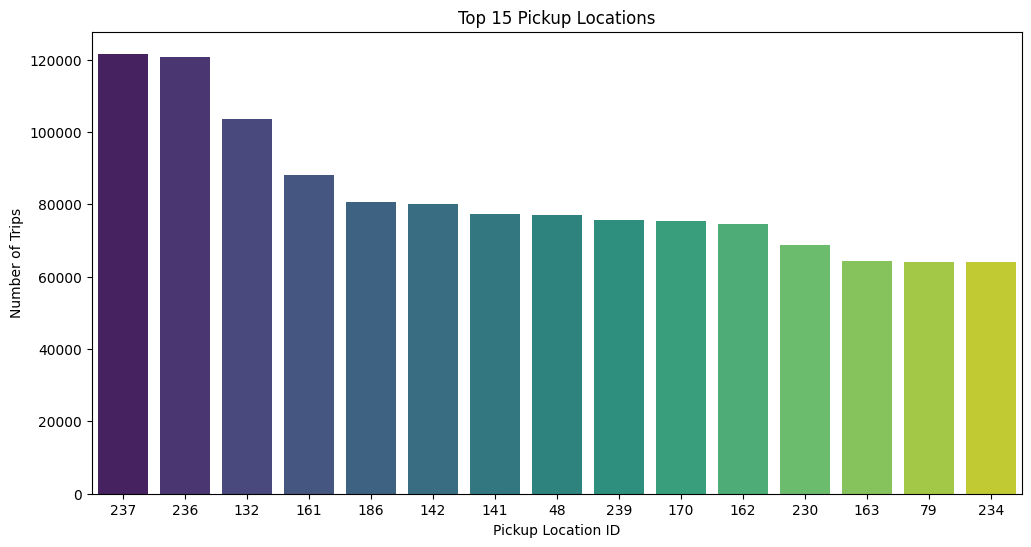

/var/folders/v4/6jx7p5p972g59nvc4vn2pzb40000gn/T/ipykernel_3604/2323822451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_do, x='DOLocationID', order=top_do, palette="plasma")


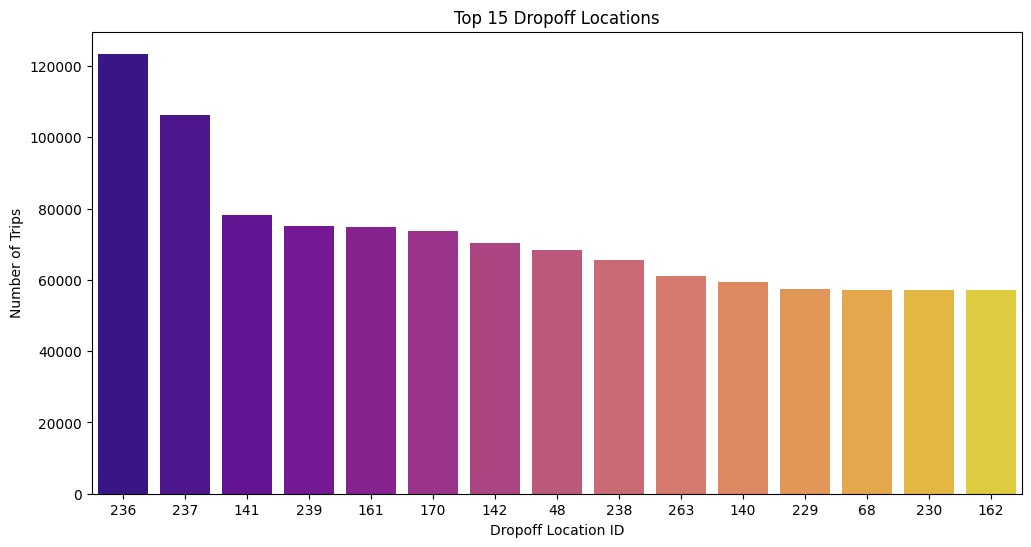

🚖 The most popular pickup location is ID 237


In [ ]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.

# --- Top 15 Pickup Locations ---
top_pu = df['PULocationID'].value_counts().nlargest(15).index
df_pu = df[df['PULocationID'].isin(top_pu)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_pu, x='PULocationID', order=top_pu, palette="viridis")
plt.title("Top 15 Pickup Locations")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.show()

# --- Top 15 Dropoff Locations ---
top_do = df['DOLocationID'].value_counts().nlargest(15).index
df_do = df[df['DOLocationID'].isin(top_do)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_do, x='DOLocationID', order=top_do, palette="plasma")
plt.title("Top 15 Dropoff Locations")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Number of Trips")
plt.show()

# --- Print the most popular pickup location ---
most_popular_pickup = df['PULocationID'].value_counts().idxmax()
print(f"The most popular pickup location is ID {most_popular_pickup}")


##Answer --> The most popular pickup location is ID 237


A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, and outliers within a numerical dataset. It provides a concise summary of key statistical measures and offers several important uses:

  - Data Distribution and Skewness: Box plots offer a visual representation of the distribution of numerical data, providing insights into its central tendency, spread, and skewness. The box represents the interquartile range (IQR), which contains the middle 50% of the data, with the median indicated by a horizontal line within the box. By observing the length and symmetry of the box, analysts can assess whether the data is skewed or symmetrically distributed.

  - Outlier Detection: Box plots are highly effective in identifying outliers, which are data points that deviate significantly from the rest of the distribution. The whiskers of the plot extend to the minimum and maximum non-outlier values, with any data points beyond the whiskers considered as potential outliers. Outliers can indicate data errors, anomalies, or important observations requiring further investigation.

  - Comparing Groups or Categories: Box plots are useful for comparing the distributions of numerical data across different groups or categories. By creating side-by-side or grouped box plots, analysts can easily compare the central tendencies, spreads, and shapes of distributions between different groups. This allows for the identification of differences, similarities, or patterns within the data.

  - Variability and Spread: Box plots provide insights into the variability and spread of the data. The length of the box indicates the spread of the middle 50% of the data, while the whiskers show the range of non-outlier values. By comparing the lengths of the boxes and whiskers, analysts can assess the relative variability between different groups or categories, aiding in the understanding of the data's dispersion.

  - Skewedness and Symmetry: Box plots offer a visual assessment of the skewness or symmetry of the data distribution. A symmetrical distribution is represented by a box plot with an equal length on both sides of the median, while a skewed distribution is indicated by a longer box on one side. This visual cue helps in understanding the shape and characteristics of the data, assisting in further analysis and modeling decisions.

  - Data Range and Quartiles: Box plots display the quartiles of the data distribution. The lower quartile (Q1) represents the 25th percentile, the upper quartile (Q3) represents the 75th percentile, and the interquartile range (IQR) is the range between Q1 and Q3. These quartiles provide a summary of the range and spread of the central portion of the data, aiding in the understanding of the data's variability and dispersion.

Your task is:

  1. Use Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?

/var/folders/v4/6jx7p5p972g59nvc4vn2pzb40000gn/T/ipykernel_3604/4252194470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="payment_type", y="total_amount", palette="Set2")


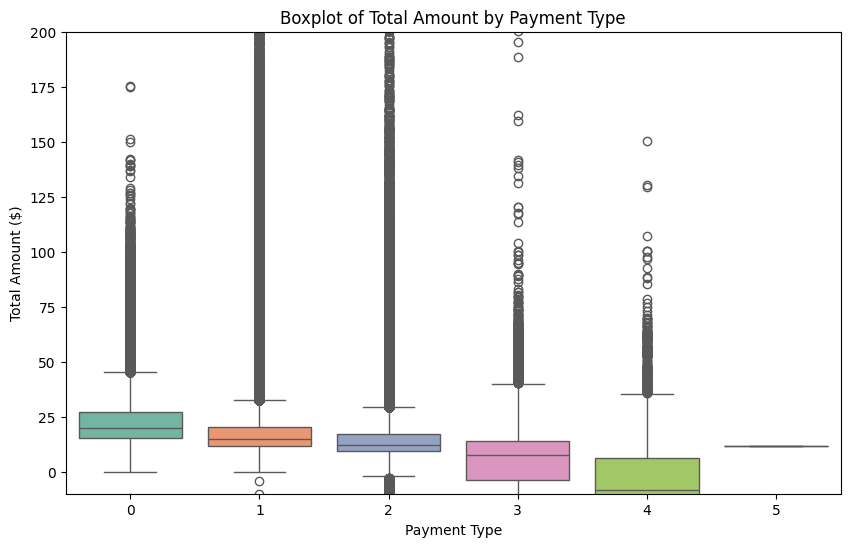

In [ ]:
# Create a box plot of total amount by payment type. Do you see anything odd?


plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="payment_type", y="total_amount", palette="Set2")
plt.ylim(-10, 200)  # zoom in to make the boxplots clearer (remove extreme outliers)
plt.title("Boxplot of Total Amount by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Total Amount ($)")
plt.show()

###Answer

###Weird patterns :

#For payment_type = 3 (“No charge”) or 4 (“Dispute”), you often see totals around $0 or even negative totals.

#Outliers: Some extreme high values (total_amount > $1000) — usually data entry errors or unusual trips.

#Negative fares (yes, they exist!) — these often come from adjustments/refunds or errors.

#Explanation:

#The boxplots for Credit Card (1) and Cash (2) look fairly normal — positive distributions centered around typical taxi fares ($10–$30).

#The weirdness comes from No Charge, Dispute, Voided trips, where totals can be 0 or negative, which are not actual fares but bookkeeping codes.



A histogram is a graphical representation that displays the distribution of a continuous or discrete numerical variable. It provides insights into the underlying data distribution and helps uncover patterns, frequencies, and ranges within the dataset. Here are some key uses and benefits of histogram plots:

  - Data Distribution: Histograms allow analysts to visualize the shape, central tendency, and spread of the data. They provide an overview of the data distribution, helping to identify if it follows a particular pattern, such as a normal distribution, skewed distribution, bimodal distribution, or multimodal distribution. Understanding the data distribution aids in selecting appropriate analysis techniques and understanding the characteristics of the data.

  - Frequency Analysis: Histograms display the frequency or count of data points within predefined bins or intervals along the x-axis. By observing the height or count of each bin, analysts can identify the frequency of occurrence for different values or value ranges. This information helps assess the concentration of data points and identify peaks or modes in the distribution.

  - Outlier Detection: Histograms can assist in identifying outliers, which are data points that significantly deviate from the rest of the distribution. Outliers may indicate data errors, unusual observations, or important anomalies requiring further investigation. By examining the tails or extreme values in the histogram, analysts can identify potential outliers that may require additional scrutiny.

  - Data Range and Spread: Histograms provide insights into the range and spread of the data. The x-axis represents the variable's values, while the y-axis represents the frequency or count of occurrences. By observing the width and span of the histogram, analysts can assess the data's range and variability. This information helps understand the data's spread and aids in subsequent analysis or decision-making processes.

  - Feature Engineering: Histograms can guide feature engineering processes by informing appropriate transformations, binning strategies, or encoding techniques for numerical variables. They assist in identifying nonlinear relationships or determining optimal cut-off points for converting continuous variables into categorical ones. Histograms also help identify data skewness and guide transformation methods to address the skew if necessary.

  - Data Quality Inspection: Histograms can be useful in detecting data quality issues or anomalies. Unusual spikes, gaps, or unexpected patterns in the histogram may indicate data entry errors, measurement inconsistencies, or missing data. By observing the histogram, analysts can identify potential data quality issues that require further investigation or preprocessing.

Your task is:

  1. Use Seaborn's [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.

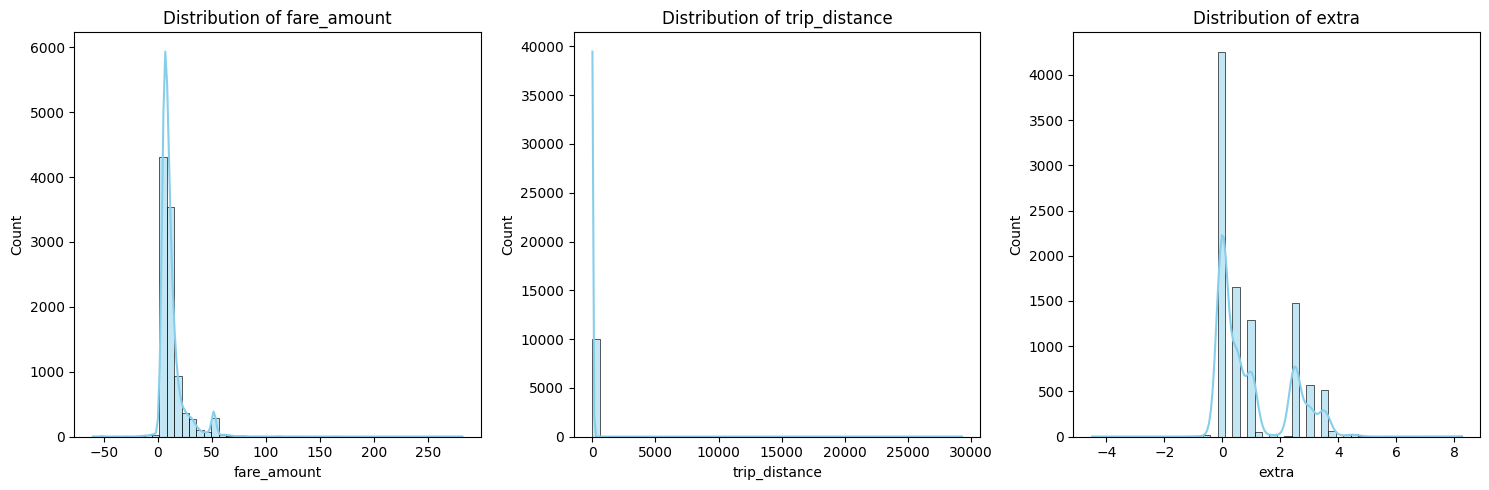

In [72]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.

# Variables of interest
cols = ['fare_amount', 'trip_distance', 'extra']

# Sample for memory efficiency (e.g., 10,000 rows)
df_sample = df[cols].dropna().sample(n=10000, random_state=42)

# Create histograms with KDE for each variable
plt.figure(figsize=(15,5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_sample[col], kde=True, bins=50, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()
